---
Material for the course "Introducción a la inteligencia artificial" UNIZAR

The following notes written by SERGIO G RODRIGO (2023-2024)</font>




---
**Simple example of regression with dense layers**
---
Diseñar y entrenar una red neuronal capaz de "sustituir" a la función $y(x)=x \sin(2\pi x)$, entrenada en el rango $x \in [0,4]$, mediante redes neuronales.

## Funciones para representar resultados

In [ ]:
def plot_score(pathresults,history_keras):
    import numpy as np
    import matplotlib.pyplot as plt
    import os

    history_dict=history_keras.history
    training_cost=history_dict['loss']
    training_accuracy=training_cost
    evaluation_cost=training_cost
    evaluation_accuracy=training_cost

    epochs=len(evaluation_cost)
    xx = np.linspace(0,epochs-1,epochs)
    # in a file
    filemse="/loss_mse_.dat"
    file=os.path.exists(pathresults+filemse)
    if (file):
        os.remove(pathresults+filemse)
        print(pathresults+filemse+" removed")
    with open(pathresults+filemse, 'w') as f1:
       for i in range(0,epochs):
           summary= str(xx[i])+' '+str(evaluation_cost[i])+' '+str(evaluation_accuracy[i])+' '+str(training_cost[i])+' '+str(training_accuracy[i])+''+'\n'
           f1.write(summary)
    f1.close()

    # as a figure
    # Four axis
    fig2, ax2 = plt.subplots(2,2, figsize=(10,10)) #sharex='col', sharey='row',
    ax2[0,0].plot(xx,evaluation_cost, color="red", label="evaluation cost")
    ax2[0,1].plot(xx,evaluation_accuracy, color="blue", label="evaluation accuracy")
    ax2[1,0].plot(xx,training_cost, color="orange", label="training cost")
    ax2[1,1].plot(xx,training_accuracy, color="cyan", label="training accuracy")
    txt = "$epoch$"
    ax2[0,0].set_xlabel(txt)
    ax2[0,0].legend()
    ax2[0,1].set_xlabel(txt)
    ax2[0,1].legend()
    ax2[1,0].set_xlabel(txt)
    ax2[1,0].legend()
    ax2[1,1].set_xlabel(txt)
    ax2[1,1].legend()
    fig2.savefig(pathresults+"/epochs_evolution.png", dpi=200, facecolor="#f1f1f1")

def GraphData(datalist, typeplotlist, labellist, linewidthlist,Title, filename_data,\
              Axx = "x", Axy = "y",\
              left=None, right=None, bottom=None, top = None):
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(8, 6))
    plt.rcParams['font.size'] = 16.
    ngraph = len(datalist)
    markers=['o','v','s',"."]
    marker_size=[5,4,3,2]
    for il in range(ngraph):
        print(labellist[il])
        plt.plot(datalist[il][0],
                 datalist[il][1],
                 typeplotlist[il],
                 label=labellist[il],
                 marker=markers[il],markersize=marker_size[il],
                 linewidth=linewidthlist[il])
    plt.axis([left, right, bottom, top])
    if ngraph != 1:
        plt.legend(loc='best')
    plt.xlabel(Axx,fontsize=30)
    plt.ylabel(Axy,fontsize=30)
    plt.title(Title, fontsize=12)
    plt.savefig(filename_data, bbox_inches='tight')
    plt.grid()
    plt.show()

## Neural Network

2.12.0
[4342 3801  219 ...  377  922 4277]
5000 train samples
500 test samples
x_train shape (5000,)
y_train shape (5000,)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________
16/16 [==============================] - 0s 2ms/step
Analytical
NN


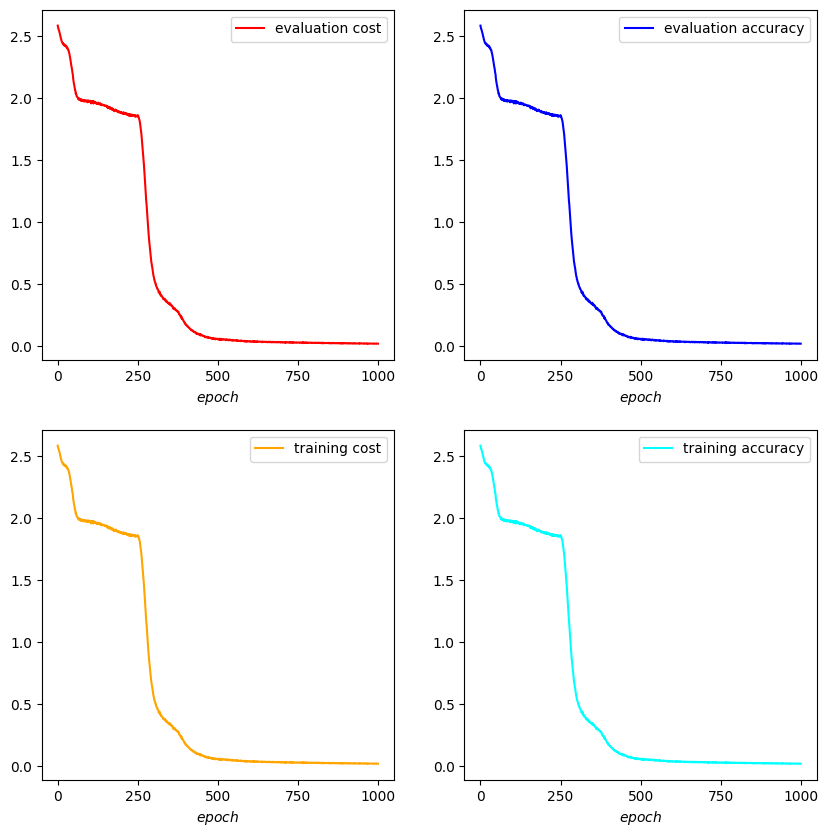

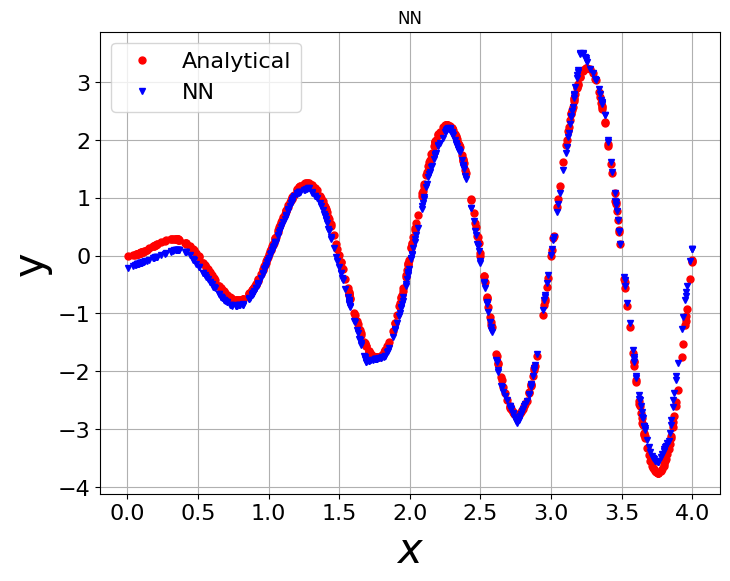

In [ ]:
import tensorflow as tf
print(tf.__version__)

# Tensorflow Keras packages
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers,Model
import numpy as np

# Define the function
def func_1D(x):
  import numpy as np
  y =  x*np.sin(2*np.pi*x)
  return y

# Training and validation datasets
n_train = 5000
n_val = 500

# Define x range
xo=0.0;xf=4.0
xdata=np.linspace(xo,xf,n_train+n_val)
ydata=func_1D(xdata)
xdata=xdata
ydata=ydata

# shuffle the data
shuffle_list = np.random.permutation(range(n_val+n_train))
print(shuffle_list)
xdata = xdata[shuffle_list]
ydata = ydata[shuffle_list]

# set training and validation data
x_train = xdata[0:n_train]
y_train = ydata[0:n_train]
x_val = xdata[n_train:n_train+n_val]
y_val = ydata[n_train:n_train+n_val]

# Check data and labels previously defined
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)

# Input and output neurons (from the data)
input_neurons  = 1
output_neurons = 1

# Hiperparameters
batch_size = 64
epochs = 1000

# Define the model
net = [input_neurons,64,64,output_neurons]
input_tensor=Input(shape=(input_neurons,))
x=layers.Dense(net[1],activation='relu')(input_tensor)
for neurons in net[2:-1]:
  x = layers.Dense(neurons,activation='relu')(x)
output_tensor = layers.Dense(output_neurons,activation=None)(x)
model = Model(input_tensor,output_tensor)
model.summary()

# Define the metrics, optimizer and loss
optimizer=RMSprop()
loss=tf.keras.losses.mean_squared_error
metrics=tf.keras.metrics.MeanSquaredError()

# Compile
model.compile(loss=loss,
          optimizer=optimizer,
          metrics=metrics)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_val, y_val))

# Plot results
plot_score("./",history)

y_pred=model.predict(x_val)

GraphData([[x_val,y_val],[x_val,y_pred]], ["r","b"], ["Analytical","NN"],\
              [0,0,0],"NN", 'pp.png', Axx = "$x$", Axy = "y")